In [1]:
# Clone MintPy, create environment, install MintPy. Environment creation takes 10-15 min
# git clone https://github.com/insarlab/MintPy.git
!mamba env create -f MintPy/docs/environment.yml
!conda activate mintpy
!python -m ipykernel install --user --name=mintpy

conda-forge/noarch       [<=>                 ] (00m:00s) 
conda-forge/noarch       [=>              ] (00m:00s) 126 KB / ?? (414.26 KB/s)
conda-forge/noarch       [=>              ] (00m:00s) 126 KB / ?? (414.26 KB/s)
pkgs/main/linux-64       [<=>                 ] (00m:00s) 
conda-forge/noarch       [=>              ] (00m:00s) 126 KB / ?? (414.26 KB/s)
pkgs/main/linux-64       [=>              ] (00m:00s) 184 KB / ?? (605.70 KB/s)
conda-forge/noarch       [=>              ] (00m:00s) 126 KB / ?? (414.26 KB/s)
pkgs/main/linux-64       [=>              ] (00m:00s) 184 KB / ?? (605.70 KB/s)
pkgs/main/noarch         [<=>                 ] (00m:00s) 
conda-forge/noarch       [=>              ] (00m:00s) 126 KB / ?? (414.26 KB/s)
pkgs/main/linux-64       [=>              ] (00m:00s) 184 KB / ?? (605.70 KB/s)
pkgs/main/noarch         [=>              ] (00m:00s) 188 KB / ?? (616.42 KB/s)
conda-forge/noarch       [=>              ] (00m:00s) 126 KB / ?? (414.26 KB/s)
pkgs/main/linux-64     

In [1]:
# Import required packages
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import mintpy
from mintpy.objects import ifgramStack
from mintpy.utils import plot as pp, utils as ut
from mintpy import view, plot_network
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity

In [2]:
# create directory for data
if not os.path.exists('/tmp/data'):
        os.makedirs('/tmp/data')

os.chdir('/tmp/data')

In [3]:
# create directory for MintPy
os.chdir('/tmp')

if not os.path.exists('/tmp/mintpy'):
        os.makedirs('/tmp/mintpy')

os.chdir('/tmp/mintpy')

In [4]:
# Function to write to MintPy config file
def write_config_file(out_file, CONFIG_TXT, mode='a'): 
    """Write configuration files for MintPy to process products"""
    if not os.path.isfile(out_file) or mode == 'w':
        with open(out_file, "w") as fid:
            fid.write(CONFIG_TXT)
        print('write configuration to file: {}'.format(out_file))
    else:
        with open(out_file, "a") as fid:
            fid.write("\n" + CONFIG_TXT)
        print('add the following to file: \n{}'.format(CONFIG_TXT))

In [24]:
CONFIG_TXT = '''# vim: set filetype=cfg:
##----------------------------- Hyp3 ---------------------##
mintpy.load.processor        = hyp3
##---------interferogram datasets:
mintpy.load.unwFile          = /tmp/data/hyp3/*/*unw_phase.tif
mintpy.load.corFile          = /tmp/data/hyp3/*/*corr.tif
##---------geometry datasets:
mintpy.load.demFile          = /tmp/data/hyp3/*/*dem.tif
mintpy.load.incAngleFile     = /tmp/data/hyp3/*/*lv_theta.tif
mintpy.load.waterMaskFile    = /tmp/data/hyp3/*/*water_mask.tif

mintpy.network.excludeDate     = 20200624,20200712,20200706
mintpy.deramp                = linear
'''

config_file = os.path.join('/tmp/mintpy', "imjaSenAT84.txt")
write_config_file(config_file, CONFIG_TXT, mode='w')

write configuration to file: /tmp/mintpy/imjaSenAT84.txt


In [11]:
# View MintPy options
!smallbaselineApp.py --help

usage: smallbaselineApp.py [-h] [--dir WORKDIR] [-g] [-H] [-v] [--plot]
                           [--start STEP] [--end STEP] [--dostep STEP]
                           [customTemplateFile]

Routine Time Series Analysis for Small Baseline InSAR Stack

positional arguments:
  customTemplateFile    custom template with option settings.
                        ignored if the default smallbaselineApp.cfg is input.

options:
  -h, --help            show this help message and exit
  --dir WORKDIR, --work-dir WORKDIR
                        work directory, (default: ./).
  -g                    generate default template (if it does not exist) and exit.
  -H                    print the default template file and exit.
  -v, --version         print software version and exit
  --plot                plot results [only] without running smallbaselineApp.

steps processing (start/end/dostep):
  Command line options for steps processing with names are chosen from the following list:
  
  ['load_data

In [25]:
# Load data into MintPy
!smallbaselineApp.py imjaSenAT84.txt --dostep load_data

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:07:19.799541--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_

In [26]:
# Examine loaded inputs to MintPy
!ls -l inputs

total 160740
-rw-r--r-- 1 jovyan jovyan   1628267 May  1 21:07 geometryGeo.h5
-rw-r--r-- 1 jovyan jovyan 162938448 May  1 21:07 ifgramStack.h5
-rw-r--r-- 1 jovyan jovyan       590 May  1 21:07 imjaSenAT84.txt
-rw-r--r-- 1 jovyan jovyan     21576 May  1 21:07 smallbaselineApp.cfg


run view.py in MintPy version v1.3.3, date 2022-04-14
input file is ifgramStack file: /tmp/mintpy/inputs/ifgramStack.h5 in float32 format
file size in y/x: (365, 382)
input dataset: "['20200108_20200120']"
num of datasets in file ifgramStack.h5: 280
num of datasets to exclude: 0
num of datasets to display: 2
data   coverage in y/x: (0, 0, 382, 365)
subset coverage in y/x: (0, 0, 382, 365)
data   coverage in lat/lon: (484480.0, 3094960.0, 499760.0, 3080360.0)
subset coverage in lat/lon: (484480.0, 3094960.0, 499760.0, 3080360.0)
------------------------------------------------------------------------
colormap: viridis
figure title: unwrapPhase
figure size : [15.00, 8.00]
dataset number: 2
row     number: 1
column  number: 3
figure  number: 1
consider reference pixel in y/x: [213, 36]
mark interferograms with 'dropIfgram=False' in red colored title
----------------------------------------
Figure 1 - unwrapPhase.png
reading data as a list of 2D matrices ...
[==============================

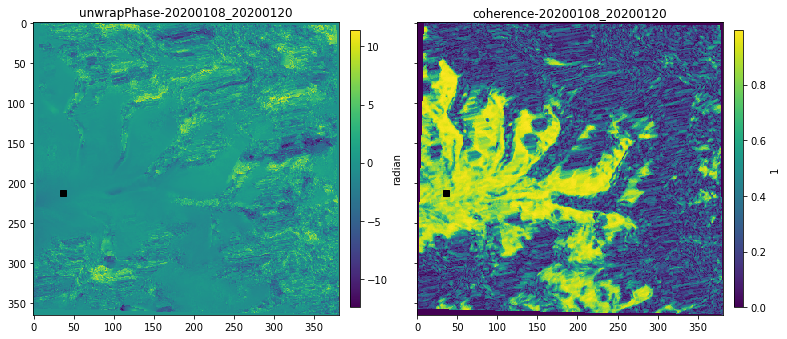

In [27]:
# Plot all data related to one interferometric pair using MintPy plotting utility
view.main('./inputs/ifgramStack.h5 20200108_20200120 --ncols 3 -c viridis'.split())

In [28]:
# Optional step prior to inversion. Remove interferograms based on coherence, temporal/perpendicular baselines, date, etc. 
!smallbaselineApp.py imjaSenAT84.txt --dostep modify_network

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:07:37.334342--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['modify_network']
Remaining steps: ['reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif -->

read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
open ifgramStack file: ifgramStack.h5
['coherenceSpatialAvg.txt'] exists and is newer than ['./inputs/ifgramStack.h5', 'waterMask.h5'] --> skip.
coherenceSpatialAvg.txt already exists, read it directly
number of acquisitions: 72
number of interferograms: 140
shift all perp baseline by -64.39257049560547 to zero mean for plotting
--------------------------------------------------
number of interferograms marked as drop: 11
number of interferograms marked as keep: 129
number of acquisitions marked as drop: 3
['20200624', '20200706', '20200712']
max coherence of excluded interferograms: 0.5266
max perpendicular baseline: 168.63 m
max temporal      baseline: 24.0 days
showing coherence
data range: [0.3135, 0.6013]
display range: (0.2, 1.0)
showing ...


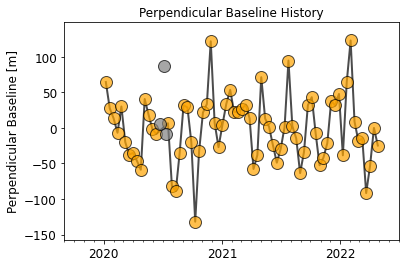

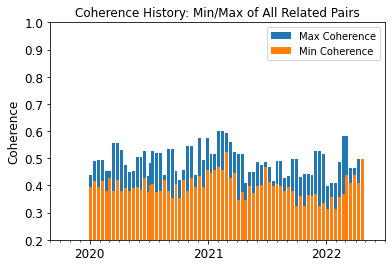

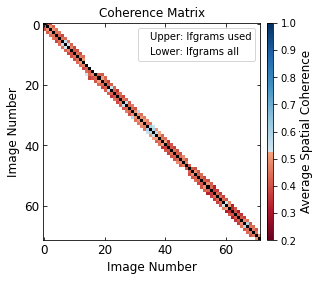

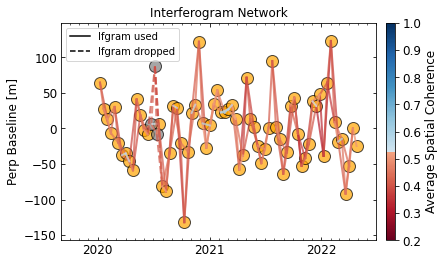

In [29]:
# Examine interferogram network using MintPy tool
plot_network.main(['./inputs/ifgramStack.h5'])

In [30]:
# Select reference point. Should be coherent and close to the aoi. 
!smallbaselineApp.py imjaSenAT84.txt --dostep reference_point

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:08:24.147256--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['reference_point']
Remaining steps: ['quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif --> /tmp/data/hyp3/*/

In [31]:
# Without inversion, quickly assesses possible deformation and phase unwrapping error by stacking phase 
!smallbaselineApp.py imjaSenAT84.txt --dostep quick_overview

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:08:32.606943--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['quick_overview']
Remaining steps: ['correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif --> /tmp/data/hyp3/*/*lv_theta.tif
    m

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is velocity file: /tmp/mintpy/avgPhaseVelocity.h5 in float32 format
file size in y/x: (365, 382)
num of datasets in file avgPhaseVelocity.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 382, 365)
subset coverage in y/x: (0, 0, 382, 365)
data   coverage in lat/lon: (484480.0, 3094960.0, 499760.0, 3080360.0)
subset coverage in lat/lon: (484480.0, 3094960.0, 499760.0, 3080360.0)
------------------------------------------------------------------------
colormap: RdBu
figure title: avgPhaseVelocity
figure size : [7.85, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of 0.0
data    range: [-55.959736, 26.159752] cm/year
display range: [-10.0, 10.0] cm/year
display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]
plot reference point
showing ...


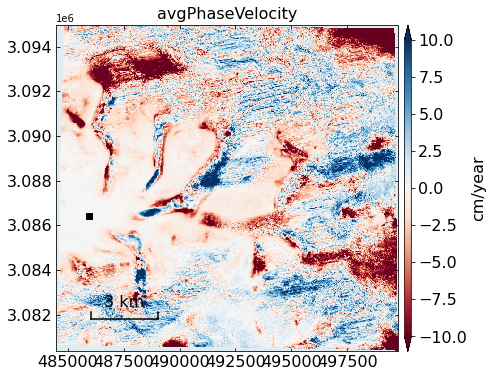

In [32]:
# Plot results of phase stacking 
view.main('avgPhaseVelocity.h5 -c RdBu -v -10 10'.split())

plot and save figure to file numTriNonzeroIntAmbiguity.png


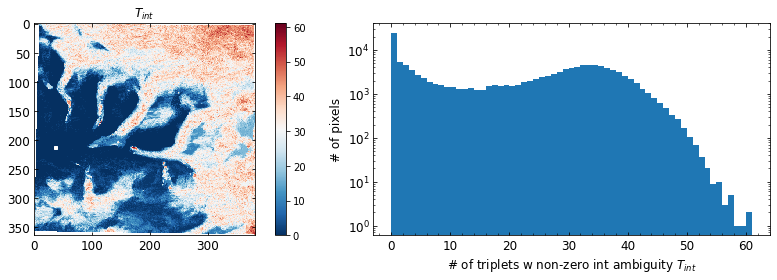

In [33]:
# Plot number of triplets with nonzero integer ambiguity, related to unwrapping error
plot_num_triplet_with_nonzero_integer_ambiguity('numTriNonzeroIntAmbiguity.h5', display=True, fig_size=[12, 4])

In [34]:
# Do time series inversion. 
!smallbaselineApp.py imjaSenAT84.txt --dostep invert_network

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:08:51.147983--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['invert_network']
Remaining steps: ['correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif --> /tmp/data/hyp3/*/*lv_theta.tif
    mintpy.load.waterMaskFile: /tmp/data/hyp3/\

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is timeseries file: /tmp/mintpy/timeseries.h5 in float32 format
file size in y/x: (365, 382)
num of datasets in file timeseries.h5: 69
datasets to exclude (0):
[]
datasets to display (69):
['timeseries-20200108', 'timeseries-20200120', 'timeseries-20200201', 'timeseries-20200213', 'timeseries-20200225', 'timeseries-20200308', 'timeseries-20200320', 'timeseries-20200401', 'timeseries-20200413', 'timeseries-20200425', 'timeseries-20200507', 'timeseries-20200519', 'timeseries-20200531', 'timeseries-20200612', 'timeseries-20200718', 'timeseries-20200730', 'timeseries-20200811', 'timeseries-20200823', 'timeseries-20200904', 'timeseries-20200916', 'timeseries-20200928', 'timeseries-20201010', 'timeseries-20201022', 'timeseries-20201103', 'timeseries-20201115', 'timeseries-20201127', 'timeseries-20201209', 'timeseries-20201221', 'timeseries-20210102', 'timeseries-20210114', 'timeseries-20210126', 'timeseries-20210207', 'timeseri

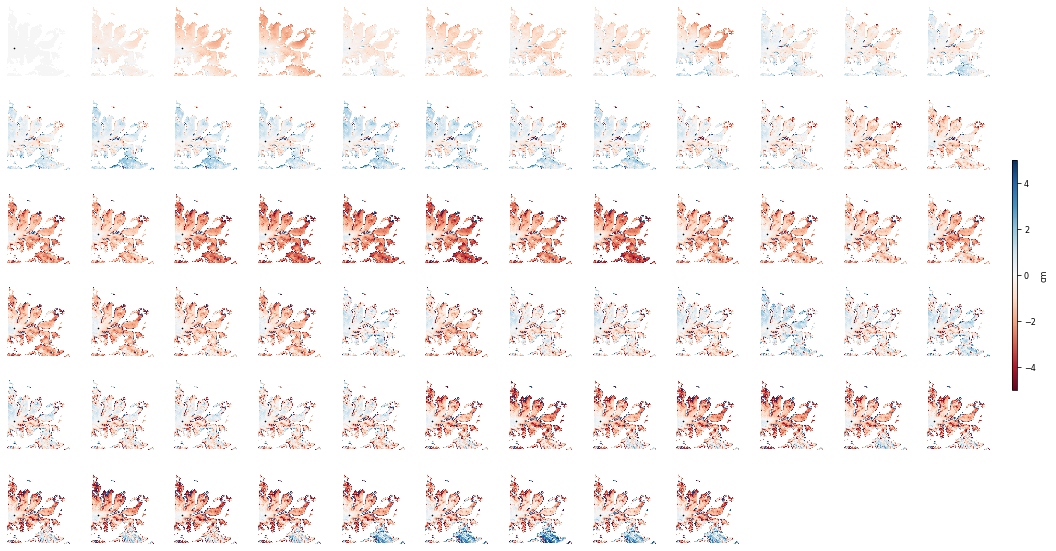

In [35]:
# Plot the raw phase time-series re-wrapped into (-5, 5) cm
view.main('timeseries.h5 --wrap --wrap-range -5 5 -u cm --notitle --notick --noaxis -c RdBu -v -5 5'.split())

view.py temporalCoherence.h5 -c gray --notick --noaxis --noverbose


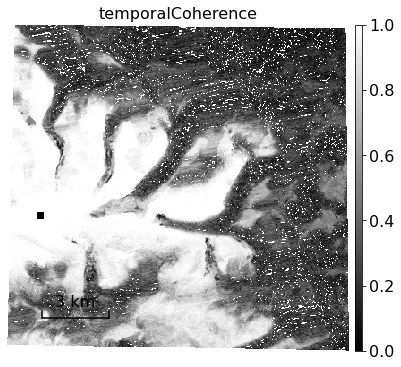

view.py maskTempCoh.h5 -c gray --notick --noaxis --noverbose


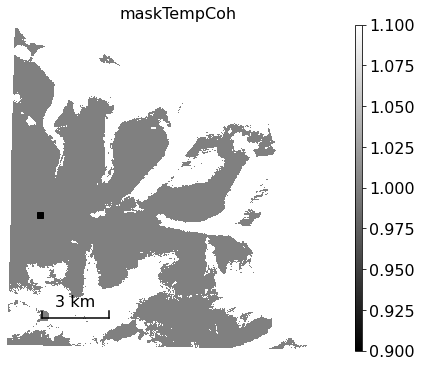

In [36]:
# Plot time series temporal coherence and mask coherence 
# Unclear to me why border is sawtooth. Will investigate further in future
view.main('temporalCoherence.h5 -c gray --notick --noaxis --noverbose'.split())
view.main('maskTempCoh.h5 -c gray --notick --noaxis --noverbose'.split())

In [38]:
!smallbaselineApp.py imjaSenAT84.txt --dostep correct_troposphere

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:14:57.775756--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['correct_troposphere']
Remaining steps: ['deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif --> /tmp/data/hyp3/*/*lv_theta.tif
    mintpy.load.waterMaskFile: /tmp/data/hyp3/\*/\*water_mask.tif --> /tmp/data/hyp3/*/*water_m

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is timeseries file: /tmp/mintpy/timeseries_ERA5.h5 in float32 format
file size in y/x: (365, 382)
num of datasets in file timeseries_ERA5.h5: 69
datasets to exclude (0):
[]
datasets to display (69):
['timeseries-20200108', 'timeseries-20200120', 'timeseries-20200201', 'timeseries-20200213', 'timeseries-20200225', 'timeseries-20200308', 'timeseries-20200320', 'timeseries-20200401', 'timeseries-20200413', 'timeseries-20200425', 'timeseries-20200507', 'timeseries-20200519', 'timeseries-20200531', 'timeseries-20200612', 'timeseries-20200718', 'timeseries-20200730', 'timeseries-20200811', 'timeseries-20200823', 'timeseries-20200904', 'timeseries-20200916', 'timeseries-20200928', 'timeseries-20201010', 'timeseries-20201022', 'timeseries-20201103', 'timeseries-20201115', 'timeseries-20201127', 'timeseries-20201209', 'timeseries-20201221', 'timeseries-20210102', 'timeseries-20210114', 'timeseries-20210126', 'timeseries-20210207',

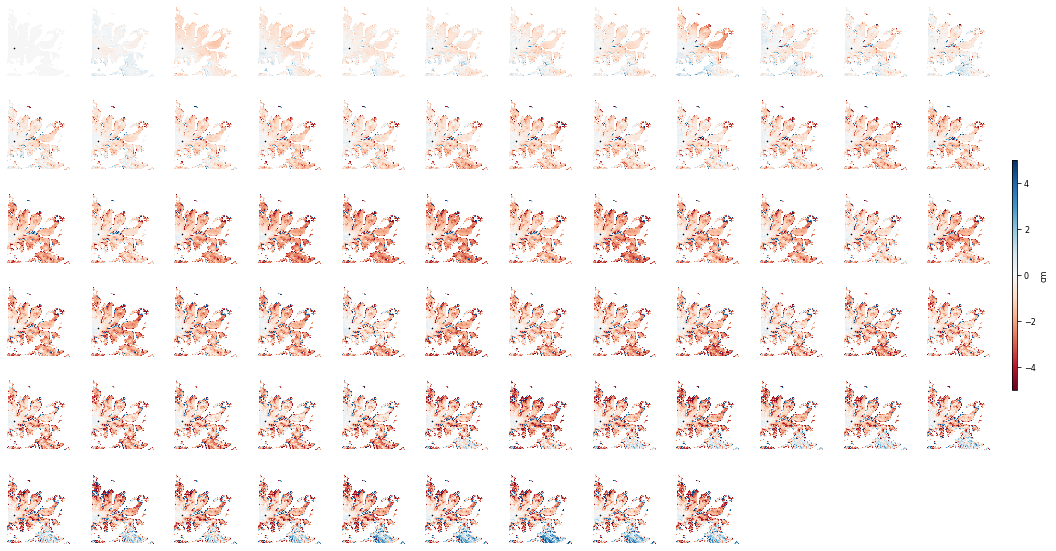

In [39]:
view.main('timeseries_ERA5.h5 --wrap --wrap-range -5 5 --notitle --notick --noaxis -c RdBu'.split())

In [40]:
!smallbaselineApp.py imjaSenAT84.txt --dostep deramp

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:52:10.771494--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['deramp']
Remaining steps: ['correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif --> /tmp/data/hyp3/*/*lv_theta.tif
    mintpy.load.waterMaskFile: /tmp/data/hyp3/\*/\*water_mask.tif --> /tmp/data/hyp3/*/*water_mask.tif
copy smallbasel

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is timeseries file: /tmp/mintpy/timeseries_ERA5_ramp.h5 in float32 format
file size in y/x: (365, 382)
num of datasets in file timeseries_ERA5_ramp.h5: 69
datasets to exclude (0):
[]
datasets to display (69):
['timeseries-20200108', 'timeseries-20200120', 'timeseries-20200201', 'timeseries-20200213', 'timeseries-20200225', 'timeseries-20200308', 'timeseries-20200320', 'timeseries-20200401', 'timeseries-20200413', 'timeseries-20200425', 'timeseries-20200507', 'timeseries-20200519', 'timeseries-20200531', 'timeseries-20200612', 'timeseries-20200718', 'timeseries-20200730', 'timeseries-20200811', 'timeseries-20200823', 'timeseries-20200904', 'timeseries-20200916', 'timeseries-20200928', 'timeseries-20201010', 'timeseries-20201022', 'timeseries-20201103', 'timeseries-20201115', 'timeseries-20201127', 'timeseries-20201209', 'timeseries-20201221', 'timeseries-20210102', 'timeseries-20210114', 'timeseries-20210126', 'timeseries-

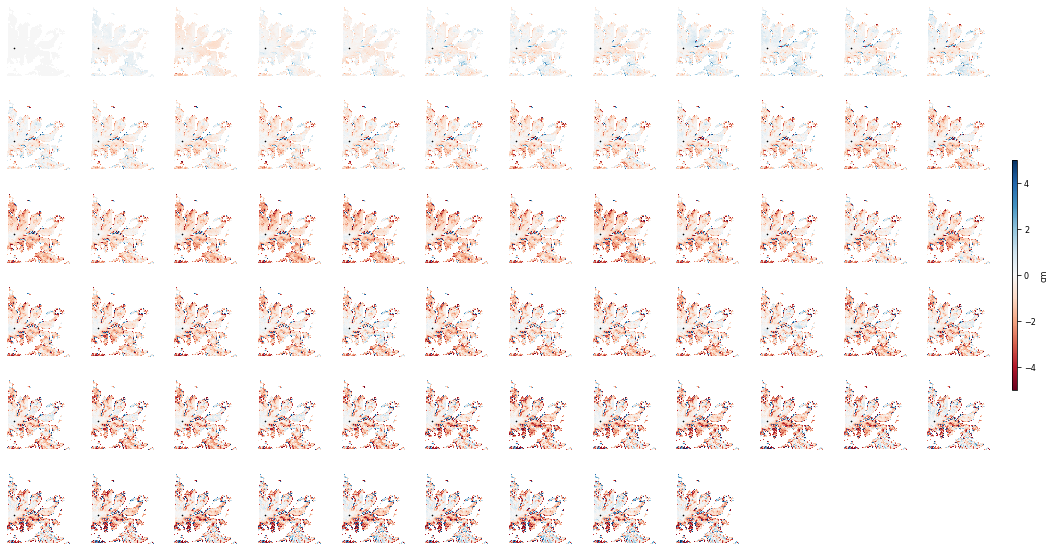

In [41]:
view.main('timeseries_ERA5_ramp.h5 --wrap --wrap-range -5 5 --notitle --notick --noaxis -c RdBu'.split())

In [42]:
# Correct phase residual caused by DEM error
!smallbaselineApp.py imjaSenAT84.txt --dostep correct_topography

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:53:41.767940--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['correct_topography']
Remaining steps: ['residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif --> /tmp/data/hyp3/*/*lv_theta.tif
    mintpy.load.waterMaskFile: /tmp/data/hyp3/\*/\*water_mask.tif --> /tmp/data/hyp3/*/*water_mask.tif
copy smallbaselineApp.cfg

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is timeseries file: /tmp/mintpy/timeseries_ERA5_ramp_demErr.h5 in float32 format
file size in y/x: (365, 382)
num of datasets in file timeseries_ERA5_ramp_demErr.h5: 69
datasets to exclude (0):
[]
datasets to display (69):
['timeseries-20200108', 'timeseries-20200120', 'timeseries-20200201', 'timeseries-20200213', 'timeseries-20200225', 'timeseries-20200308', 'timeseries-20200320', 'timeseries-20200401', 'timeseries-20200413', 'timeseries-20200425', 'timeseries-20200507', 'timeseries-20200519', 'timeseries-20200531', 'timeseries-20200612', 'timeseries-20200718', 'timeseries-20200730', 'timeseries-20200811', 'timeseries-20200823', 'timeseries-20200904', 'timeseries-20200916', 'timeseries-20200928', 'timeseries-20201010', 'timeseries-20201022', 'timeseries-20201103', 'timeseries-20201115', 'timeseries-20201127', 'timeseries-20201209', 'timeseries-20201221', 'timeseries-20210102', 'timeseries-20210114', 'timeseries-20210126'

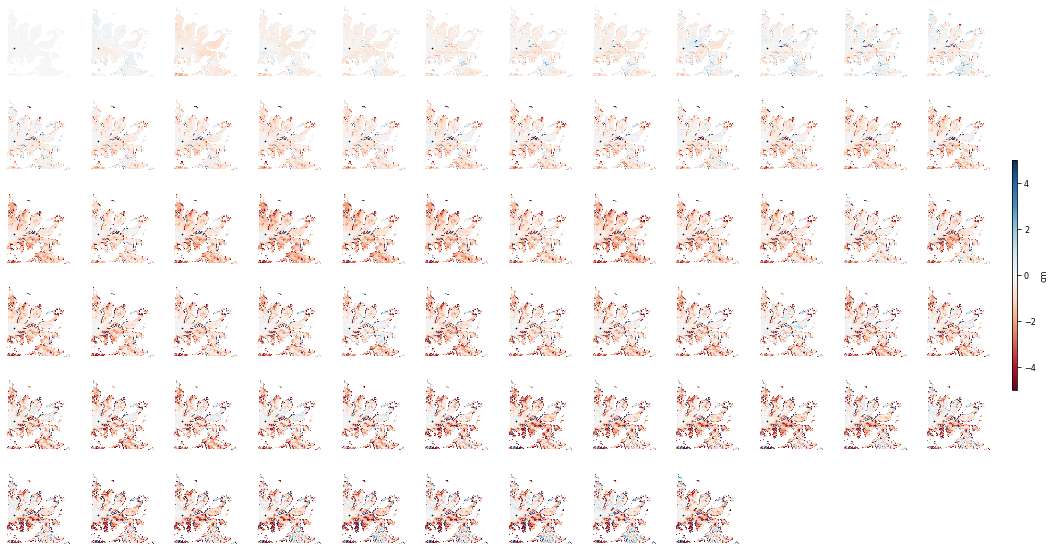

In [43]:
# View DEM error-corrected time series
view.main('timeseries_ERA5_ramp_demErr.h5 --wrap --wrap-range -5 5 --notitle --notick --noaxis -c RdBu'.split())

In [44]:
# Calculate average velocity of time series 
!smallbaselineApp.py imjaSenAT84.txt --dostep velocity

MintPy version v1.3.3, date 2022-04-14
--RUN-at-2022-05-01 21:57:49.588814--
Current directory: /tmp/mintpy
Run routine processing with smallbaselineApp.py on steps: ['velocity']
Remaining steps: ['geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: imjaSenAT84
Go to work directory: /tmp/mintpy
read custom template file: /tmp/mintpy/imjaSenAT84.txt
update default template based on input custom template
    mintpy.load.unwFile: /tmp/data/hyp3/\*/\*unw_phase.tif --> /tmp/data/hyp3/*/*unw_phase.tif
    mintpy.load.corFile: /tmp/data/hyp3/\*/\*corr.tif --> /tmp/data/hyp3/*/*corr.tif
    mintpy.load.demFile: /tmp/datahyp3/\*/\*dem.tif --> /tmp/data/hyp3/*/*dem.tif
    mintpy.load.incAngleFile: /tmp/data/hyp3/\*/\*lv_theta.tif --> /tmp/data/hyp3/*/*lv_theta.tif
    mintpy.load.waterMaskFile: /tmp/data/hyp3/\*/\*water_mask.tif --> /tmp/data/hyp3/*/*water_mask.tif
copy smallbaselineApp.cfg to inputs   directory for backup.
copy smallbaselineApp

view.py velocity.h5 --notick --noaxis --noverbose -c RdBu -v -5 5


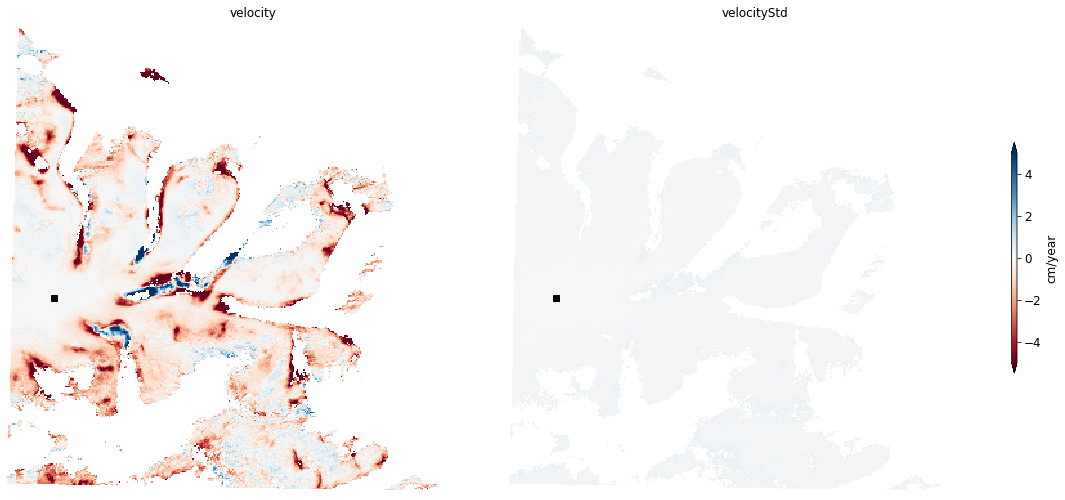

In [46]:
# View original and troposphere corrected velocities
view.main('velocity.h5 --notick --noaxis --noverbose -c RdBu -v -5 5'.split())